<a href="https://www.pieriandata.com"><img src="Pierian_Data_Logo(1).PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras API Project Exercise

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

## NOTE: Do not download the full zip from the link! We provide a special version of this file that has some extra feature engineering for you to do. You won't be able to follow along with the original file!

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Starter Code

#### Note: We also provide feature information on the data as a .csv file for easy lookup throughout the notebook:

In [1]:
import pandas as pd

In [2]:
data_info = pd.read_csv('DATA/lending_club_info.csv', index_col='LoanStatNew')

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [5]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [6]:
feat_info('mort_acc')

Number of mortgage accounts.


In [7]:
data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [8]:
for x in data_info.index:
    print(x, '\t', end='')
    feat_info(x)

loan_amnt 	The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
term 	The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate 	Interest Rate on the loan
installment 	The monthly payment owed by the borrower if the loan originates.
grade 	LC assigned loan grade
sub_grade 	LC assigned loan subgrade
emp_title 	The job title supplied by the Borrower when applying for the loan.*
emp_length 	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
home_ownership 	The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
annual_inc 	The self-reported annual income provided by the borrower during registration.
verification_status 	Indicates if income was verified by LC, not v

## Loading the data and other imports

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [11]:
df = pd.read_csv('DATA/lending_club_loan_two.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [13]:
df.shape

(396030, 27)

# Project Tasks

**Complete the tasks below! Keep in mind is usually more than one way to complete the task! Enjoy**

-----
------

# Section 1: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**


----

**TASK: Since we will be attempting to predict loan_status, create a countplot as shown below.**

<AxesSubplot:xlabel='loan_status', ylabel='count'>

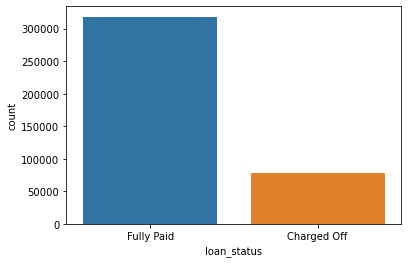

In [11]:
sns.countplot(x='loan_status', data=df)

**TASK: Create a histogram of the loan_amnt column.**

(0.0, 42500.0)

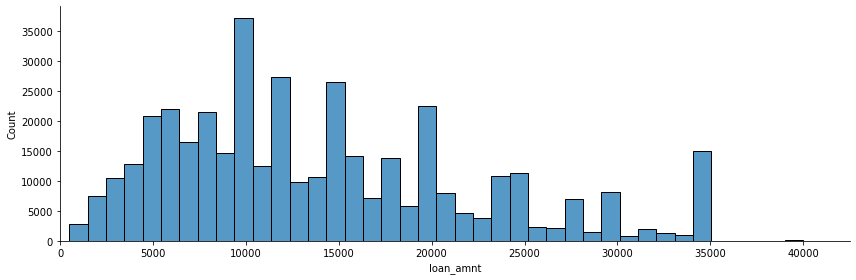

In [13]:
sns.displot(x='loan_amnt', data=df, bins=40, height=4, aspect=3)
plt.xlim(0,42500)

**TASK: Let's explore correlation between the continuous feature variables. Calculate the correlation between all continuous numeric variables using .corr() method.**

In [14]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


**TASK: Visualize this using a heatmap. Depending on your version of matplotlib, you may need to manually adjust the heatmap.**

* [Heatmap info](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)
* [Help with resizing](https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot)

<AxesSubplot:>

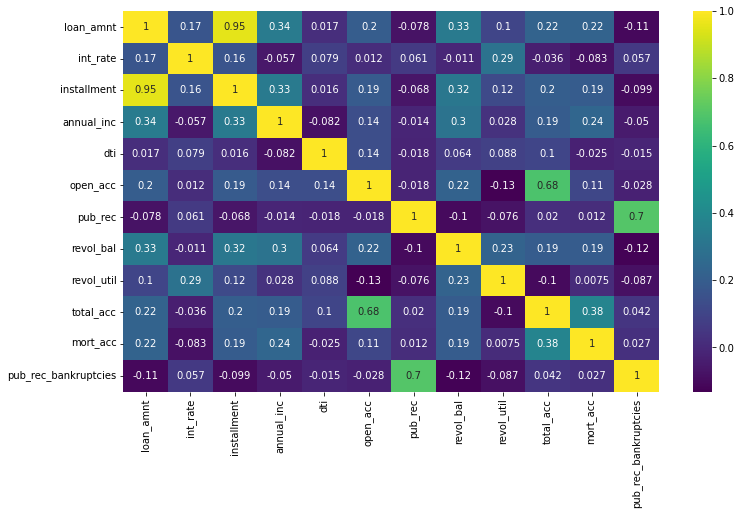

In [15]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

**TASK: You should have noticed almost perfect correlation with the "installment" feature. Explore this feature further. Print out their descriptions and perform a scatterplot between them. Does this relationship make sense to you? Do you think there is duplicate information here?**

In [16]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [17]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

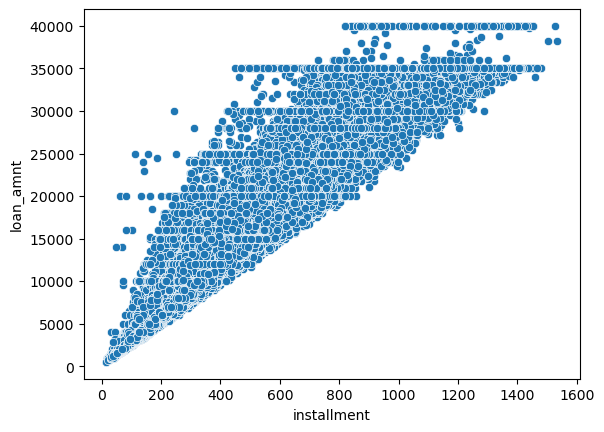

In [18]:
sns.scatterplot(x='installment', y='loan_amnt', data=df)

**TASK: Create a boxplot showing the relationship between the loan_status and the Loan Amount.**

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

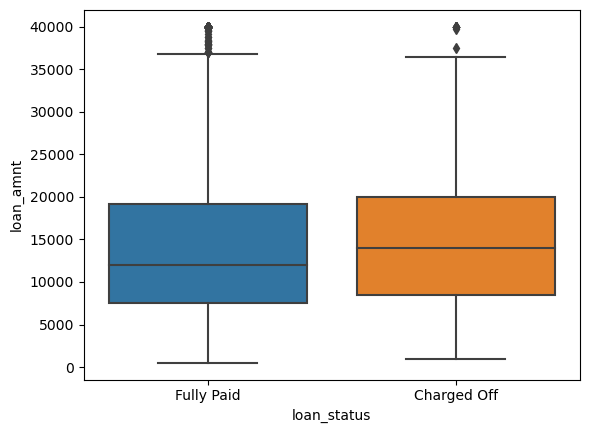

In [19]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

**TASK: Calculate the summary statistics for the loan amount, grouped by the loan_status.**

In [20]:
status = df.groupby(by='loan_status')['loan_amnt']

In [21]:
status.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**TASK: Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?**

In [22]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [23]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [24]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

**TASK: Create a countplot per grade. Set the hue to the loan_status label.**

<AxesSubplot:xlabel='grade', ylabel='count'>

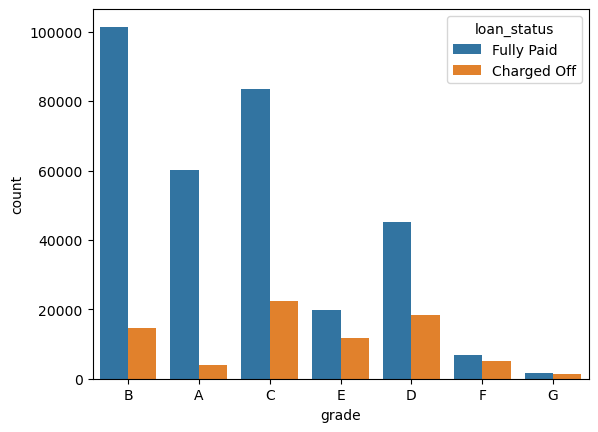

In [25]:
sns.countplot(x='grade', data=df, hue='loan_status')

**TASK: Display a count plot per subgrade. You may need to resize for this plot and [reorder](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) the x axis. Feel free to edit the color palette. Explore both all loans made per subgrade as well being separated based on the loan_status. After creating this plot, go ahead and create a similar plot, but set hue="loan_status"**

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

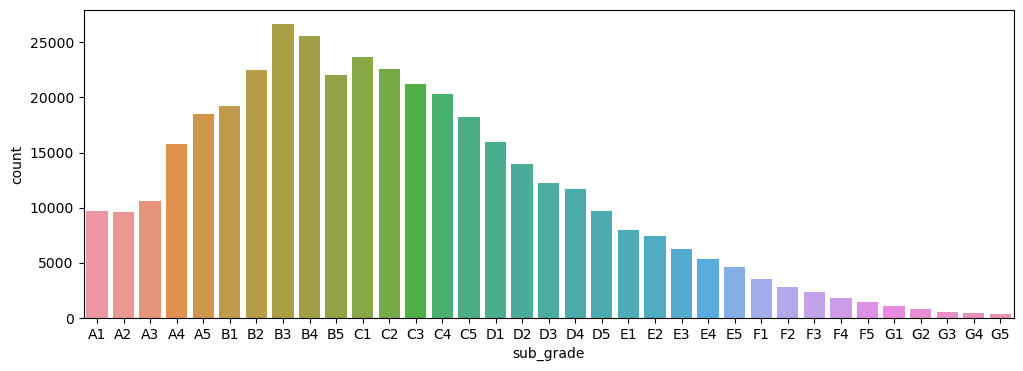

In [26]:
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade', data=df.sort_values(by='sub_grade', ascending= True))

In [27]:
full_paid = df[df['loan_status'] == 'Fully Paid'].groupby('sub_grade')
charg = df[df['loan_status'] == 'Charged Off'].groupby('sub_grade')

In [28]:
full_paid = full_paid.count()['grade']
full_paid

sub_grade
A1     9450
A2     9106
A3     9962
A4    14680
A5    16953
B1    17291
B2    20054
B3    23367
B4    22058
B5    18661
C1    19552
C2    18120
C3    16586
C4    15507
C5    13773
D1    11774
D2    10040
D3     8749
D4     8028
D5     6595
E1     5193
E2     4701
E3     3846
E4     3254
E5     2729
F1     2166
F2     1591
F3     1289
F4      972
F5      717
G1      570
G2      390
G3      270
G4      206
G5      157
Name: grade, dtype: int64

In [29]:
charg = charg.count()['grade']
charg

sub_grade
A1     279
A2     461
A3     614
A4    1109
A5    1573
B1    1891
B2    2441
B3    3288
B4    3543
B5    3424
C1    4110
C2    4460
C3    4635
C4    4773
C5    4471
D1    4219
D2    3911
D3    3474
D4    3629
D5    3105
E1    2724
E2    2730
E3    2361
E4    2107
E5    1843
F1    1370
F2    1175
F3     997
F4     815
F5     680
G1     488
G2     364
G3     282
G4     168
G5     159
Name: grade, dtype: int64

In [30]:
subg = pd.DataFrame({'full':full_paid, 'charg':charg})

In [31]:
subg

,full,charg
sub_grade,,
A1,9450,279
A2,9106,461
A3,9962,614
A4,14680,1109
A5,16953,1573
B1,17291,1891
B2,20054,2441
B3,23367,3288
B4,22058,3543


In [32]:
subg['pay ratio'] = subg['full']/(subg['charg']+subg['full'])

In [33]:
subg

,full,charg,pay ratio
sub_grade,,,
A1,9450,279,0.971323
A2,9106,461,0.951814
A3,9962,614,0.941944
A4,14680,1109,0.929761
A5,16953,1573,0.915092
B1,17291,1891,0.901418
B2,20054,2441,0.891487
B3,23367,3288,0.876646
B4,22058,3543,0.861607


<AxesSubplot:xlabel='sub_grade', ylabel='pay ratio'>

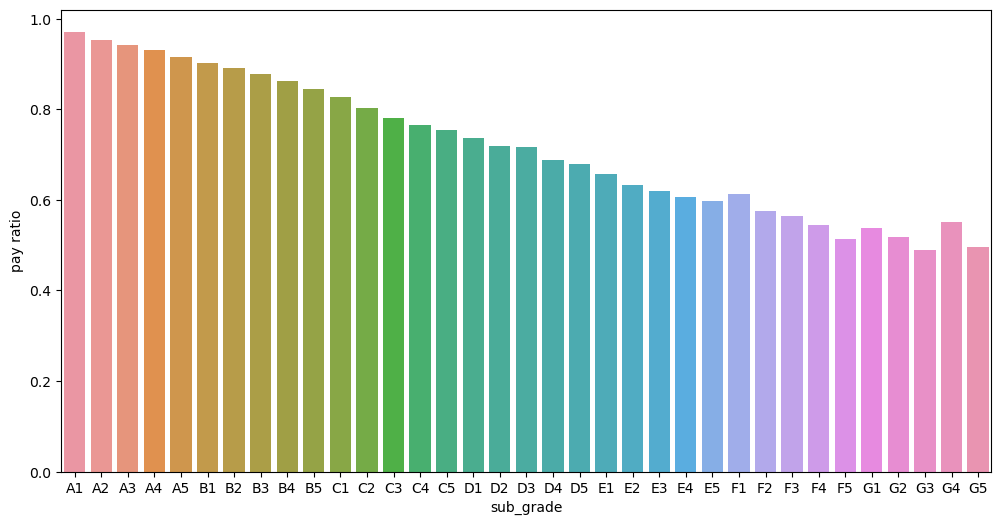

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(x=subg.index, y='pay ratio', data=subg)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

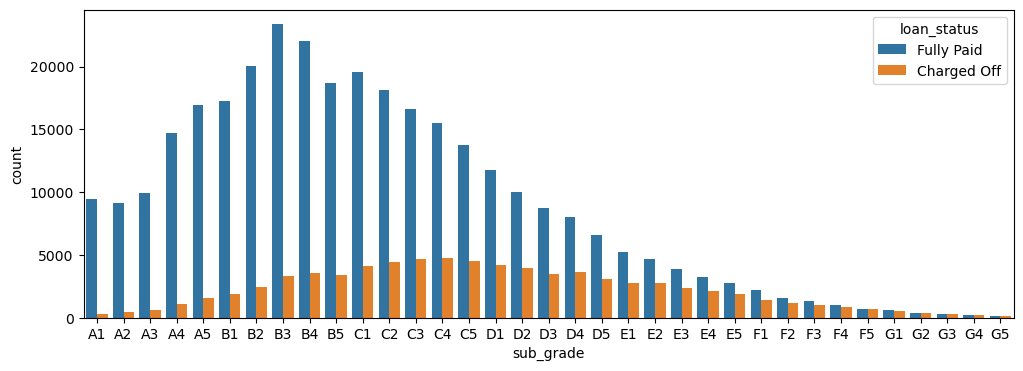

In [35]:
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade', data=df.sort_values(by='sub_grade', ascending= True), hue='loan_status')

In [36]:
df.sort_values(by='sub_grade', ascending= True)['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

**TASK: It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.**

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

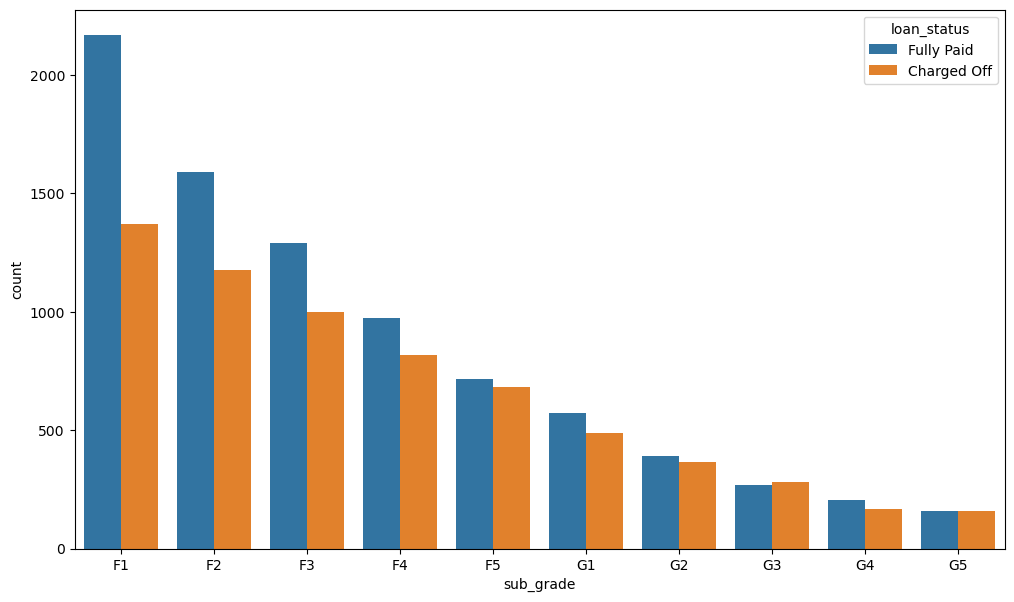

In [37]:
f_g = df[(df['grade'] == 'F')|(df['grade'] == 'G')].sort_values(by='sub_grade', ascending=True)
hue_ord = sorted(f_g['loan_status'].unique(), reverse=True)

plt.figure(figsize=(12,7))
sns.countplot(x='sub_grade', data=f_g, hue='loan_status', hue_order=hue_ord)

**TASK: Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [38]:
# CODE HERE

In [39]:
stat = df['loan_status'].unique()

In [40]:
stat[0]

'Fully Paid'

In [41]:
df['loan_repaid'] = df['loan_status'].map({stat[0]:1, stat[1]:0})

In [42]:
df[['loan_repaid', 'loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


**CHALLENGE TASK: (Note this is hard, but can be done in one line!) Create a bar plot showing the correlation of the numeric features to the new loan_repaid column. [Helpful Link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)**

In [43]:
repaid_corr = df.corr()[['loan_repaid']].drop(labels='loan_repaid', axis=0).sort_values(by='loan_repaid',ascending=True)

In [44]:
repaid_corr

,loan_repaid
int_rate,-0.247758
revol_util,-0.082373
dti,-0.062413
loan_amnt,-0.059836
installment,-0.041082
open_acc,-0.028012
pub_rec,-0.019933
pub_rec_bankruptcies,-0.009383
revol_bal,0.010892
total_acc,0.017893


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'int_rate'),
  Text(1, 0, 'revol_util'),
  Text(2, 0, 'dti'),
  Text(3, 0, 'loan_amnt'),
  Text(4, 0, 'installment'),
  Text(5, 0, 'open_acc'),
  Text(6, 0, 'pub_rec'),
  Text(7, 0, 'pub_rec_bankruptcies'),
  Text(8, 0, 'revol_bal'),
  Text(9, 0, 'total_acc'),
  Text(10, 0, 'annual_inc'),
  Text(11, 0, 'mort_acc')])

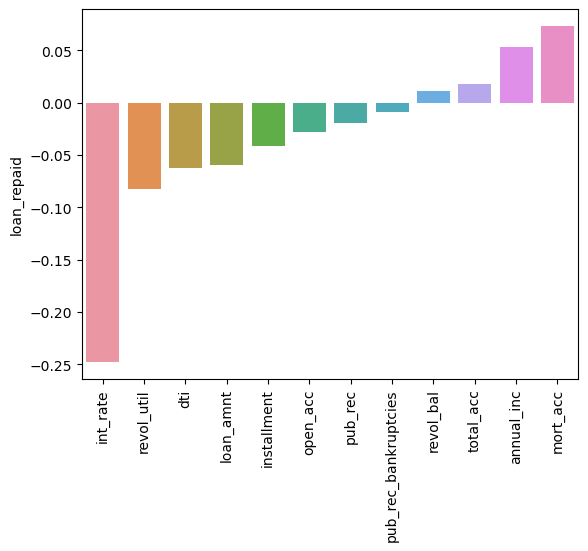

In [45]:
sns.barplot(x=repaid_corr.index, y='loan_repaid', data=repaid_corr)
plt.xticks(rotation=90)

<AxesSubplot:>

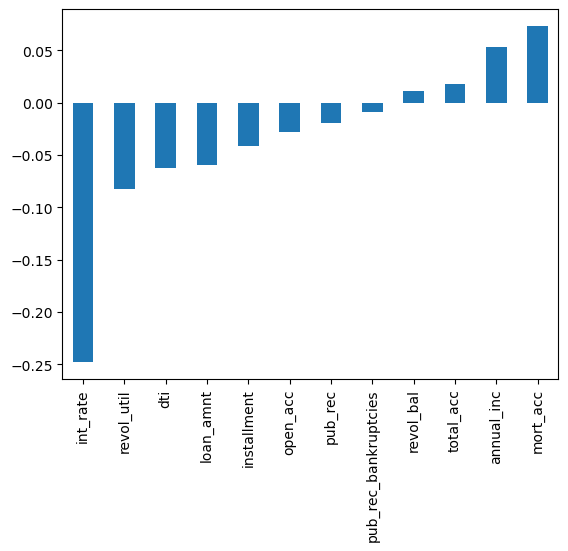

In [46]:
df.corr()['loan_repaid'].sort_values(ascending=True).drop('loan_repaid').plot(kind='bar')

---
---
# Section 2: Data PreProcessing

**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



In [47]:
columns=[]

for x in df.columns:
    columns.append([x, df[x].dtype, df[x].isnull().sum(), round((df[x].isna().sum()/len(df[x])) * 100,2),
                   df[x].nunique(), list(df[x].unique())])
    
describe = pd.DataFrame(data=columns, columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'])
describe

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,loan_amnt,float64,0,0.00,1397,"[10000.0, 8000.0, 15600.0, 7200.0, 24375.0, 20..."
1,term,object,0,0.00,2,"[ 36 months, 60 months]"
2,int_rate,float64,0,0.00,566,"[11.44, 11.99, 10.49, 6.49, 17.27, 13.33, 5.32..."
3,installment,float64,0,0.00,55706,"[329.48, 265.68, 506.97, 220.65, 609.33, 677.0..."
4,grade,object,0,0.00,7,"[B, A, C, E, D, F, G]"
5,sub_grade,object,0,0.00,35,"[B4, B5, B3, A2, C5, C3, A1, B2, C1, A5, E4, A..."
6,emp_title,object,22927,5.79,173105,"[Marketing, Credit analyst , Statistician, Cli..."
7,emp_length,object,18301,4.62,11,"[10+ years, 4 years, < 1 year, 6 years, 9 year..."
8,home_ownership,object,0,0.00,6,"[RENT, MORTGAGE, OWN, OTHER, NONE, ANY]"
9,annual_inc,float64,0,0.00,27197,"[117000.0, 65000.0, 43057.0, 54000.0, 55000.0,..."


In [48]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


# Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

**TASK: What is the length of the dataframe?**

In [49]:
df.shape[0]

396030

**TASK: Create a Series that displays the total count of missing values per column.**

In [50]:
null = df.isna().sum()
null[null != 0]

emp_title               22927
emp_length              18301
title                    1755
revol_util                276
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64

**TASK: Convert this Series to be in term of percentage of the total DataFrame**

In [51]:
null = null/df.shape[0]*100
null[null != 0]

emp_title               5.789208
emp_length              4.621115
title                   0.443148
revol_util              0.069692
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
dtype: float64

**TASK: Let's examine emp_title and emp_length to see whether it will be okay to drop them. Print out their feature information using the feat_info() function from the top of this notebook.**

In [52]:
feat_info('emp_title')
print('\n')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


**TASK: How many unique employment job titles are there?**

In [53]:
df['emp_title'].nunique()

173105

In [54]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

**TASK: Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.**

In [55]:
df = df.drop('emp_title', axis=1)

**TASK: Create a count plot of the emp_length feature column. Challenge: Sort the order of the values.**

In [56]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [57]:
newl = list(df['emp_length'].dropna().unique())
newl.sort()
ordered = newl[2:10]
ordered.insert(0, newl[10])
ordered.insert(1, newl[0])
ordered.append(newl[1])
ordered

['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

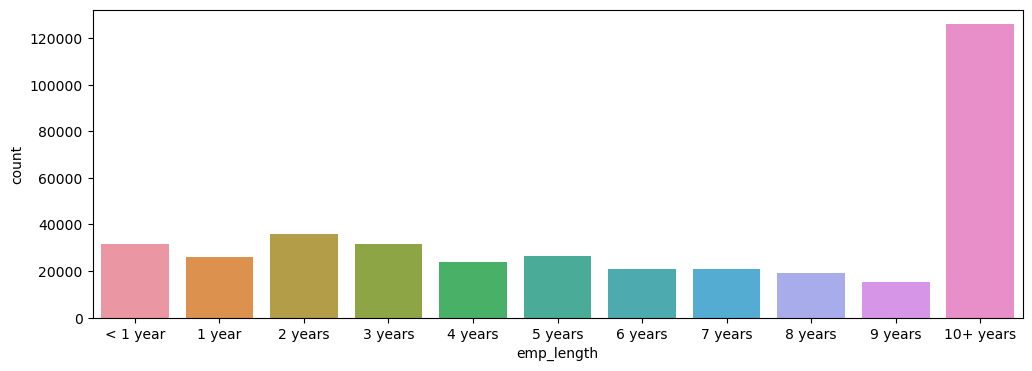

In [58]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length', data=df, order=ordered)

**TASK: Plot out the countplot with a hue separating Fully Paid vs Charged Off**

<AxesSubplot:xlabel='emp_length', ylabel='count'>

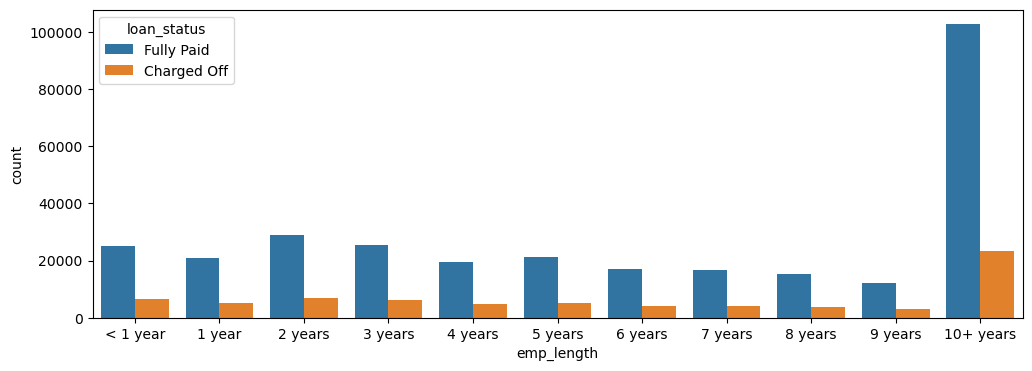

In [59]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length', data=df, order=ordered, hue='loan_status')

**CHALLENGE TASK: This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. There are a multitude of ways to create this Series. Once you've created it, see if visualize it with a [bar plot](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html). This may be tricky, refer to solutions if you get stuck on creating this Series.**

In [60]:
Paid = df[df['loan_status'] == 'Fully Paid'].groupby('emp_length').count()['loan_status']
Paid

emp_length
1 year        20728
10+ years    102826
2 years       28903
3 years       25483
4 years       19344
5 years       21403
6 years       16898
7 years       16764
8 years       15339
9 years       12244
< 1 year      25162
Name: loan_status, dtype: int64

In [61]:
Charge = df[df['loan_status'] == 'Charged Off'].groupby('emp_length').count()['loan_status']
Charge

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_status, dtype: int64

In [62]:
perc = Charge/Paid*100
perc

emp_length
1 year       24.864917
10+ years    22.576975
2 years      23.955991
3 years      24.259310
4 years      23.821340
5 years      23.791057
6 years      23.334122
7 years      24.188738
8 years      24.962514
9 years      25.073505
< 1 year     26.082982
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='emp_length'>

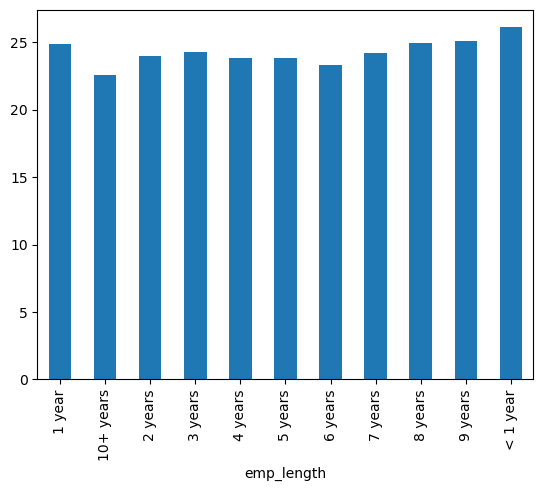

In [63]:
perc.plot(kind='bar')

**TASK: Charge off rates are extremely similar across all employment lengths. Go ahead and drop the emp_length column.**

In [64]:
df = df.drop('emp_length', axis=1)

**TASK: Revisit the DataFrame to see what feature columns still have missing data.**

In [65]:
null = df.isna().sum()
null[null > 0]

title                    1755
revol_util                276
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64

**TASK: Review the title column vs the purpose column. Is this repeated information?**

In [66]:
df['purpose'].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

In [67]:
df['title'].value_counts()

Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: title, Length: 48817, dtype: int64

**TASK: The title column is simply a string subcategory/description of the purpose column. Go ahead and drop the title column.**

In [68]:
df = df.drop('title', axis=1)

---
**NOTE: This is one of the hardest parts of the project! Refer to the solutions video if you need guidance, feel free to fill or drop the missing values of the mort_acc however you see fit! Here we're going with a very specific approach.**


---
**TASK: Find out what the mort_acc feature represents**

In [69]:
feat_info('mort_acc')

Number of mortgage accounts.


**TASK: Create a value_counts of the mort_acc column.**

In [70]:
df['mort_acc'].nunique()

33

In [71]:
df['mort_acc'].describe()

count    358235.000000
mean          1.813991
std           2.147930
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          34.000000
Name: mort_acc, dtype: float64

**TASK: There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! Let's review the other columsn to see which most highly correlates to mort_acc**

In [72]:
df.corr()['mort_acc'].sort_values(ascending=True)

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

**TASK: Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:**

In [73]:
print('Mean of mort_acc column per total_acc')
df.groupby('total_acc').mean()['mort_acc']

Mean of mort_acc column per total_acc


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

**CHALLENGE TASK: Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. This involves using an .apply() method with two columns. Check out the link below for more info, or review the solutions video/notebook.**

[Helpful Link](https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe) 

In [74]:
mort_avg = df.groupby('total_acc').mean()['mort_acc']

In [75]:
mort_nan = df[df['mort_acc'].isna()].index

In [76]:
'''
val = [np.nan for nan in range(len(mort_nan))]
numbers = [x for x, y in enumerate(mort_nan)]
print('val length is {}'.format(len(val)))
print('number length is {}'.format(len(numbers)))
'''

"\nval = [np.nan for nan in range(len(mort_nan))]\nnumbers = [x for x, y in enumerate(mort_nan)]\nprint('val length is {}'.format(len(val)))\nprint('number length is {}'.format(len(numbers)))\n"

In [77]:
'''
df.loc[mort_nan, 'mort_acc'] = val
df.loc[mort_nan, 'mort_acc']
'''

"\ndf.loc[mort_nan, 'mort_acc'] = val\ndf.loc[mort_nan, 'mort_acc']\n"

In [78]:
def mort_fill(mort_acc, total_acc):
    if np.isnan(mort_acc):
        return mort_avg[total_acc]
    else:
        return mort_acc

In [79]:
mort_fill(2, 3)

2

In [80]:
df['mort_acc'] = df.apply(lambda x: mort_fill(x['mort_acc'], x['total_acc']), axis=1)

In [81]:
df.isna().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

**TASK: revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Go ahead and remove the rows that are missing those values in those columns with dropna().**

In [82]:
df = df.dropna(subset=['revol_util', 'pub_rec_bankruptcies'])

In [83]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**

**TASK: List all the columns that are currently non-numeric. [Helpful Link](https://stackoverflow.com/questions/22470690/get-list-of-pandas-dataframe-columns-based-on-data-type)**

[Another very useful method call](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)

In [84]:
columns=[]

for x in df.select_dtypes('object').columns:
    columns.append([x, df[x].dtype, df[x].isnull().sum(), round((df[x].isna().sum()/len(df[x])) * 100,2),
                   df[x].nunique(), list(df[x].unique())])
    
describe = pd.DataFrame(data=columns, columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'])
describe

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,term,object,0,0.0,2,"[ 36 months, 60 months]"
1,grade,object,0,0.0,7,"[B, A, C, E, D, F, G]"
2,sub_grade,object,0,0.0,35,"[B4, B5, B3, A2, C5, C3, A1, B2, C1, A5, E4, A..."
3,home_ownership,object,0,0.0,6,"[RENT, MORTGAGE, OWN, OTHER, ANY, NONE]"
4,verification_status,object,0,0.0,3,"[Not Verified, Source Verified, Verified]"
5,issue_d,object,0,0.0,112,"[Jan-2015, Nov-2014, Apr-2013, Sep-2015, Sep-2..."
6,loan_status,object,0,0.0,2,"[Fully Paid, Charged Off]"
7,purpose,object,0,0.0,14,"[vacation, debt_consolidation, credit_card, ho..."
8,earliest_cr_line,object,0,0.0,684,"[Jun-1990, Jul-2004, Aug-2007, Sep-2006, Mar-1..."
9,initial_list_status,object,0,0.0,2,"[w, f]"


In [85]:
df.select_dtypes('object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

---
**Let's now go through all the string features to see what we should do with them.**

---


### term feature

**TASK: Convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().**

In [86]:
df['term'] = df['term'].map({' 36 months':36, ' 60 months':60})

In [87]:
df['term'].unique()

array([36, 60], dtype=int64)

### grade feature

**TASK: We already know grade is part of sub_grade, so just drop the grade feature.**

In [88]:
df = df.drop('grade', axis=1)

**TASK: Convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. Remember to drop the original subgrade column and to add drop_first=True to your get_dummies call.**

In [89]:
subgrade_dummy = pd.get_dummies(df['sub_grade'], drop_first=True)

In [90]:
subgrade_dummy

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
396026,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
396027,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
df = pd.concat([df.drop('sub_grade', axis=1), subgrade_dummy], axis=1)

In [92]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [93]:
df.select_dtypes('object').columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose 
**TASK: Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [94]:
columns=[]

for x in df.select_dtypes('object').columns:
    columns.append([x, df[x].dtype, df[x].isnull().sum(), round((df[x].isna().sum()/len(df[x])) * 100,2),
                   df[x].nunique(), list(df[x].unique())])
    
describe = pd.DataFrame(data=columns, columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'])
describe

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,home_ownership,object,0,0.0,6,"[RENT, MORTGAGE, OWN, OTHER, ANY, NONE]"
1,verification_status,object,0,0.0,3,"[Not Verified, Source Verified, Verified]"
2,issue_d,object,0,0.0,112,"[Jan-2015, Nov-2014, Apr-2013, Sep-2015, Sep-2..."
3,loan_status,object,0,0.0,2,"[Fully Paid, Charged Off]"
4,purpose,object,0,0.0,14,"[vacation, debt_consolidation, credit_card, ho..."
5,earliest_cr_line,object,0,0.0,684,"[Jun-1990, Jul-2004, Aug-2007, Sep-2006, Mar-1..."
6,initial_list_status,object,0,0.0,2,"[w, f]"
7,application_type,object,0,0.0,3,"[INDIVIDUAL, JOINT, DIRECT_PAY]"
8,address,object,0,0.0,392898,"[0174 Michelle Gateway\nMendozaberg, OK 22690,..."


In [95]:
dummies = pd.get_dummies(data=df[['verification_status', 'application_type', 'initial_list_status', 'purpose']], 
                         drop_first=True)
dummies.columns

Index(['verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],
      dtype='object')

In [96]:
df = df.drop(labels=['verification_status', 'application_type', 'initial_list_status', 'purpose'], axis=1)

In [97]:
df = pd.concat([df, dummies],axis=1)

In [98]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purp

### home_ownership
**TASK:Review the value_counts for the home_ownership column.**

In [99]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

**TASK: Convert these to dummy variables, but [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [100]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [101]:
home_dummy = pd.get_dummies(data=df['home_ownership'], drop_first=True)
df = df.drop('home_ownership', axis=1)
df = pd.concat([df,home_dummy], axis=1)

In [102]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTH

### address
**TASK: Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.**

In [103]:
df.select_dtypes('object').columns

Index(['issue_d', 'loan_status', 'earliest_cr_line', 'address'], dtype='object')

In [104]:
df['zip_code'] = df['address'].apply(lambda x: x[-5:])
df['zip_code']

0         22690
1         05113
2         05113
3         00813
4         11650
          ...  
396025    30723
396026    05113
396027    70466
396028    29597
396029    48052
Name: zip_code, Length: 395219, dtype: object

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '22690'),
  Text(1, 0, '05113'),
  Text(2, 0, '00813'),
  Text(3, 0, '11650'),
  Text(4, 0, '30723'),
  Text(5, 0, '70466'),
  Text(6, 0, '29597'),
  Text(7, 0, '48052'),
  Text(8, 0, '86630'),
  Text(9, 0, '93700')])

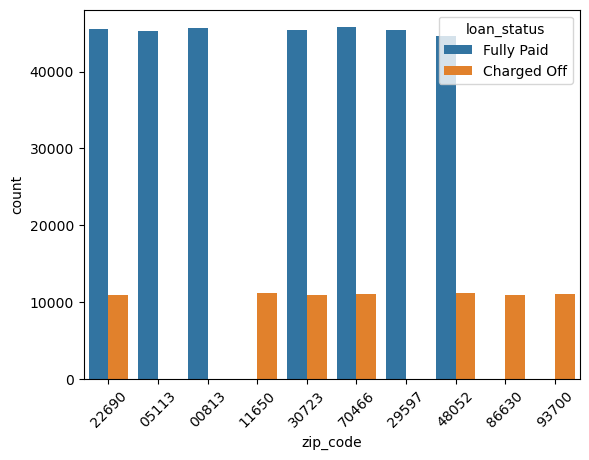

In [105]:
sns.countplot(x='zip_code', data=df, hue='loan_status')
plt.xticks(rotation=45)

**TASK: Now make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column.**

In [106]:
zip_dummy = pd.get_dummies(data=df['zip_code'], drop_first=True)
zip_dummy.head()

,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0


In [107]:
df = df.drop('address', axis=1)

In [108]:
df = df.drop('zip_code', axis=1)
df = pd.concat([df, zip_dummy], axis=1)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT'

### issue_d 

**TASK: This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.**

In [109]:
df = df.drop('issue_d', axis=1)

In [110]:
df.select_dtypes('object')

,loan_status,earliest_cr_line
0,Fully Paid,Jun-1990
1,Fully Paid,Jul-2004
2,Fully Paid,Aug-2007
3,Fully Paid,Sep-2006
4,Charged Off,Mar-1999
...,...,...
396025,Fully Paid,Nov-2004
396026,Fully Paid,Feb-2006
396027,Fully Paid,Mar-1997
396028,Fully Paid,Nov-1990


### earliest_cr_line
**TASK: This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.**

In [111]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x: int(x[-4:]))
df = df.drop('earliest_cr_line', axis=1)

In [112]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT', '05113',
       '11650', '226

In [113]:
df.select_dtypes('object').columns

Index(['loan_status'], dtype='object')

## Train Test Split

**TASK: Import train_test_split from sklearn.**

In [114]:
from sklearn.model_selection import train_test_split

**TASK: drop the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.**

In [115]:
df = df.drop('loan_status', axis=1)

**TASK: Set X and y variables to the .values of the features and label.**

In [116]:
X = df.drop('loan_repaid', axis=1).values
y = df['loan_repaid'].values

----
----

# OPTIONAL

## Grabbing a Sample for Training Time

### OPTIONAL: Use .sample() to grab a sample of the 490k+ entries to save time on training. Highly recommended for lower RAM computers or if you are not using GPU.

----
----

In [117]:
val0 = df['loan_repaid'].value_counts()[0]
val1 = df['loan_repaid'].value_counts()[1]
print('{} val0 \n{} val1'.format(val0, val1))

77523 val0 
317696 val1


In [118]:
drop_index = list(df[df['loan_repaid'] == 1].index)

In [119]:
import random

In [120]:
drop_index = random.sample(drop_index, k=val1-val0)

In [121]:
#df = df.drop(drop_index, axis=0)

In [122]:
val0 = df['loan_repaid'].value_counts()[0]
val1 = df['loan_repaid'].value_counts()[1]
print('{} val0 \n{} val1'.format(val0, val1))

77523 val0 
317696 val1


In [123]:
#X = df.drop('loan_repaid', axis=1).values
#y = df['loan_repaid'].values

In [124]:
#df = df.sample(frac=0.1,random_state=101)
print(len(df))

395219


**TASK: Perform a train/test split with test_size=0.2 and a random_state of 101.**

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [126]:
X_train.shape

(316175, 78)

In [127]:
X_test.shape

(79044, 78)

## Normalizing the Data

**TASK: Use a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data.**

In [128]:
from sklearn.preprocessing import MinMaxScaler

In [129]:
scaler = MinMaxScaler()

In [130]:
scaler.fit(X_train)

MinMaxScaler()

In [131]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Creating the Model

**TASK: Run the cell below to import the necessary Keras functions.**

In [132]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [133]:
X_train.shape

(316175, 78)

**TASK: Build a sequential model to will be trained on the data. You have unlimited options here, but here is what the solution uses: a model that goes 78 --> 39 --> 19--> 1 output neuron. OPTIONAL: Explore adding [Dropout layers](https://keras.io/layers/core/) [1](https://en.wikipedia.org/wiki/Dropout_(neural_networks)) [2](https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab)**

In [134]:
model = Sequential()

# Choose whatever number of layers/neurons you want.
model.add(Dense(units=156, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.compile(optimizer= 'adam', loss='binary_crossentropy')

**TASK: Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Optional: add in a batch_size of 256.**

In [135]:
earlystop = EarlyStopping(monitor='val_loss', mode='min', patience=25, verbose=1)

In [136]:
model.fit(x=X_train, y=y_train, epochs=25, validation_data=(X_test, y_test), batch_size=256, callbacks=[earlystop])

Epoch 1/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2893 - val_loss: 0.2650
Epoch 2/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2639 - val_loss: 0.2632
Epoch 3/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2621 - val_loss: 0.2629
Epoch 4/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2613 - val_loss: 0.2625
Epoch 5/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2607 - val_loss: 0.2620
Epoch 6/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2603 - val_loss: 0.2620
Epoch 7/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2595 - val_loss: 0.2620
Epoch 8/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2593 - val_loss: 0.2620
Epoch 9/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2588 - val_loss: 0.2619
Epoch 10/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.258

**TASK: OPTIONAL: Save your model.**

In [137]:
from tensorflow.keras.models import load_model

In [138]:
model.save('first model.h5')

# Section 3: Evaluating Model Performance.

**TASK: Plot out the validation loss versus the training loss.**

<AxesSubplot:>

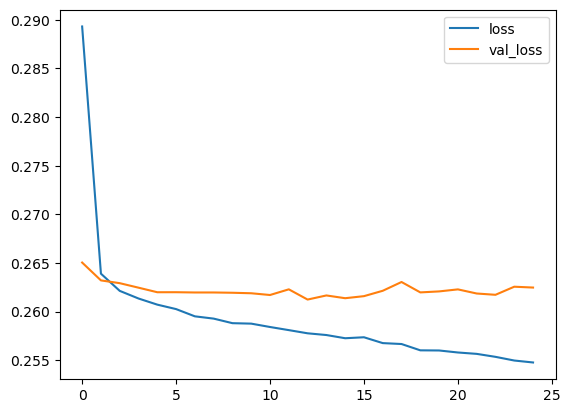

In [139]:
losses = pd.DataFrame(model.history.history)
losses.plot()

**TASK: Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [140]:
from sklearn.metrics import classification_report, confusion_matrix

In [141]:
n_pred = model.predict(X_test)

In [142]:
predict = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [143]:
predict.shape

(79044, 1)

In [144]:
n_pred.shape

(79044, 1)

In [145]:
new = np.concatenate((n_pred, predict), axis=1)

In [146]:
pred = pd.DataFrame(data=new)

In [147]:
pred.columns = ['one', 'two']

In [148]:
pred[pred['two'] == 0].count()

one    6896
two    6896
dtype: int64

In [149]:
pred[pred['two'] == 1].count()

one    72148
two    72148
dtype: int64

In [150]:
pred[pred['one'] > 0.5].count()

one    72148
two    72148
dtype: int64

In [151]:
pred[pred['one'] < 0.5].count()

one    6896
two    6896
dtype: int64

In [152]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.99      0.44      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



<AxesSubplot:>

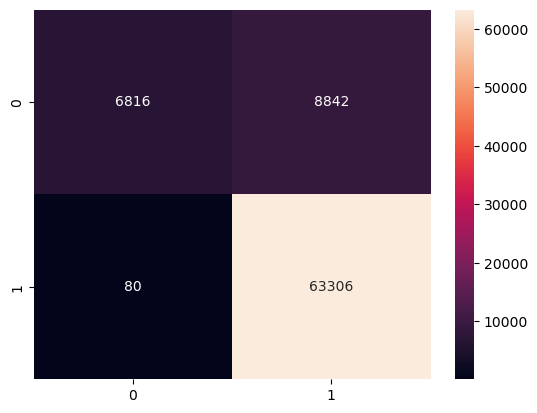

In [153]:
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt='d')

**TASK: Given the customer below, would you offer this person a loan?**

In [154]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [155]:
model.predict_classes(new_customer.values.reshape(1,78))

array([[1]])

**TASK: Now check, did this person actually end up paying back their loan?**

In [156]:
df['loan_repaid'].iloc[random_ind]

1

# GREAT JOB!